In [10]:
from fastai.column_data import *

In [4]:
PATH='data/kaggle1/'
sample = pd.read_csv(f'{PATH}sample_submission.csv', low_memory=False)

In [105]:
train = pd.read_csv(f'{PATH}train.csv', low_memory=False)
test = pd.read_csv(f'{PATH}test.csv', low_memory=False)

In [106]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
arr = np.array(train[5:6]); arr

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   3, 141, 202, 254, 193,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 165, 254, 179, 163, 249, 244,  72,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        135, 254, 150,   0, 

In [8]:
label = arr[0][0]
arr = np.delete(arr, 0)
arr = arr.reshape(28,28)

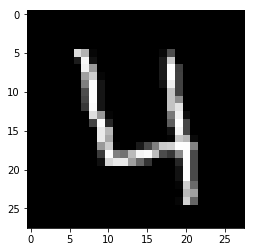

In [9]:
plt.imshow(arr, cmap='gray')

In [24]:
len(train)

42000

In [110]:
train = np.array(train)
test = np.array(test)
train

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [115]:
labels = []; digits = []; x_test = []
for i in range(len(train)):
    labels.append(train[i][0])
    digits.append(train[i][1:].reshape(28,28))
for i in range(len(test)):
    x_test.append(test[i].reshape(28,28))

(1, <matplotlib.image.AxesImage at 0x1d60aaa4550>)

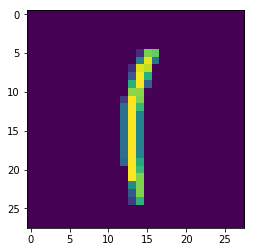

In [116]:
index = 77
labels[index], plt.imshow(digits[index])

In [117]:
digits = np.array(digits).astype(float)
x_test = np.array(x_test).astype(float)
labels = np.array(labels)
digits.shape

(42000, 28, 28)

In [118]:
digits = np.expand_dims(digits, axis=1)
x_test = np.expand_dims(x_test, axis=1)
digits.shape, x_test.shape

((42000, 1, 28, 28), (28000, 1, 28, 28))

In [119]:
digits = np.broadcast_to(digits, (len(digits), 3, 28, 28))
x_test = np.broadcast_to(x_test, (len(x_test), 3, 28, 28))
digits.shape, x_test.shape

((42000, 3, 28, 28), (28000, 3, 28, 28))

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train, x_val, y_train, y_val = train_test_split(digits, labels, test_size=0.20, random_state=42)

In [122]:
x_train.shape

(33600, 3, 28, 28)

In [124]:
dataSet = ImageClassifierData.from_arrays(PATH, (x_train, y_train), (x_val, y_val), test = x_test, bs=64)

In [125]:
from fastai.conv_learner import *

In [126]:
learn = ConvLearner.pretrained(resnet34, dataSet, precompute=False)

In [127]:
lrf=learn.lr_find()

 82%|█████████████████████████████████████████████████████████▌            | 432/525 [00:05<00:01, 81.57it/s, loss=2.3]


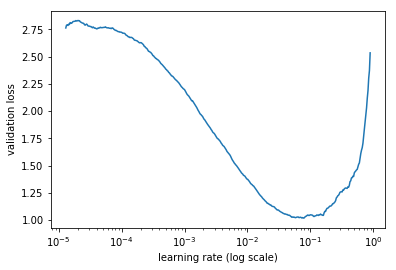

In [128]:
learn.sched.plot()

In [129]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.568645   0.37095    0.887381  
    1      0.494538   0.32489    0.901667                                                                              



[array([0.32489]), 0.9016666666666666]

In [130]:
learn.unfreeze()

In [131]:
lr=np.array([1e-4, 1e-3, 1e-2])

In [133]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.049407   0.045662   0.986667  
    1      0.040464   0.04035    0.988333                                                                              
    2      0.023511   0.037345   0.989167                                                                              
    3      0.033291   0.039264   0.989405                                                                              
    4      0.018496   0.040751   0.988333                                                                              
    5      0.013916   0.037909   0.989286                                                                              
    6      0.01462    0.038263   0.989524                                                                              
    7      0.018944   0.038784   0.990714                                                                           

[array([0.0356]), 0.9911904761904762]

In [86]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)